In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [4]:
df = pd.read_csv("../data/cleaned-premier-league-data.csv")

In [5]:
df.shape

(1246, 11)

In [6]:
df.head()

,date,home_team,away_team,home_outcome,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,last_home_result,last_away_result
0,08/08/2015,2,1,0,7.024,3.303,3.748,18,17,0,0
1,08/08/2015,6,22,1,6.697,4.338,8.967,1,8,0,0
2,08/08/2015,8,24,1,6.842,3.514,4.852,11,18,0,0
3,08/08/2015,12,21,2,7.000,3.207,3.742,14,16,0,0
4,08/08/2015,15,23,2,6.477,3.651,5.318,4,5,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1246 non-null   object 
 1   home_team         1246 non-null   int64  
 2   away_team         1246 non-null   int64  
 3   home_outcome      1246 non-null   int64  
 4   avg_odd_home_win  1246 non-null   float64
 5   avg_odd_draw      1246 non-null   float64
 6   avg_odd_away_win  1246 non-null   float64
 7   home_ranking      1246 non-null   int64  
 8   away_ranking      1246 non-null   int64  
 9   last_home_result  1246 non-null   int64  
 10  last_away_result  1246 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 107.2+ KB


In [9]:
df.describe()

,home_team,away_team,home_outcome,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,last_home_result,last_away_result
count,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000
mean,13.856340,13.745586,1.133226,7.274838,4.441469,3.684693,11.115570,10.457464,-0.089888,0.072231
std,8.224427,8.194932,0.851120,1.043937,1.647506,1.604586,5.543357,5.684987,0.851143,0.860326
min,0.000000,0.000000,0.000000,5.463000,2.935000,2.005000,1.000000,1.000000,-1.000000,-1.000000
25%,7.000000,7.000000,0.000000,6.492000,3.250000,2.544750,7.000000,6.000000,-1.000000,-1.000000
50%,14.000000,14.000000,1.000000,7.056000,3.535000,3.197000,11.000000,10.000000,0.000000,0.000000
75%,21.000000,21.000000,2.000000,7.885250,6.383250,4.292000,16.000000,15.000000,1.000000,1.000000
max,27.000000,27.000000,2.000000,10.355000,9.088000,9.057000,20.000000,20.000000,1.000000,1.000000


In [10]:
df['ranking_diff'] = df['home_ranking']-df['away_ranking']

In [11]:
wins_df = df[df['home_outcome'] ==2]

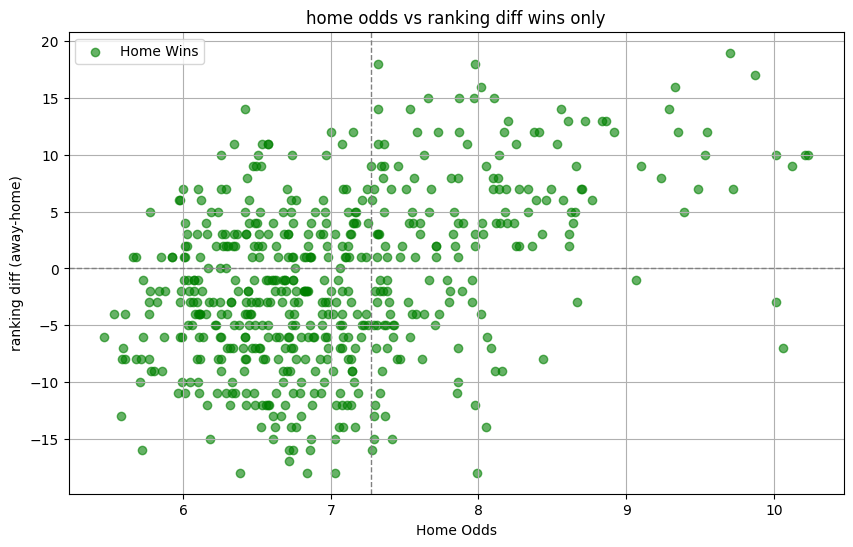

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(wins_df['avg_odd_home_win'],wins_df['ranking_diff'],
            c='green',alpha=0.6,label='Home Wins')
plt.xlabel('Home Odds')
plt.ylabel('ranking diff (away-home)')
plt.title('home odds vs ranking diff wins only')
plt.axhline(0,color='grey',linestyle='--',linewidth=1)
plt.axvline(df['avg_odd_home_win'].mean(),color='grey',linestyle='--',linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

In [13]:
X = df[['avg_odd_home_win', 'ranking_diff', 'avg_odd_draw','avg_odd_away_win','last_home_result']]
y = df['home_outcome']


In [14]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(996, 5)
(996,)
(250, 5)
(250,)


In [16]:

forestclassification = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
forestclassification.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [17]:
y_pred = forestclassification.predict(X_test)

In [18]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.47      0.48        89
           1       0.32      0.19      0.24        63
           2       0.52      0.67      0.59        98

    accuracy                           0.48       250
   macro avg       0.44      0.45      0.44       250
weighted avg       0.46      0.48      0.46       250

[[42 14 33]
 [24 12 27]
 [20 12 66]]
accuracy: 0.48


precission is how accurate in percentage the model was at guessing certain outcomes ie 0 = a team losing it have an accuracy of 56% of. 
the overarching accuracy of the entire model is 48%

the matrix works as following taking the first row,39 nine was placed correctly in the loss,14 was wrongly calculated in draw and 36 was wrongly placed in win repeat per row

In [19]:
model_file = '../data/myrandomforest.pkl'

joblib.dump(forestclassification,model_file)

['../data/myrandomforest.pkl']

In [20]:
load_model = joblib.load(model_file)
y_predict = load_model.predict(X_test)

